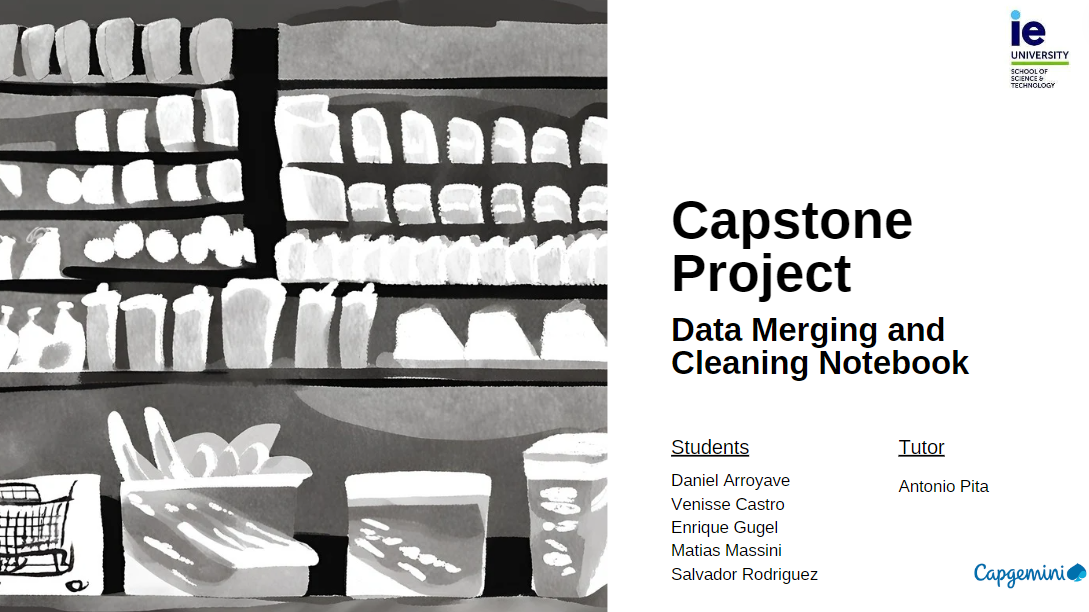

The purpose of this notebook is to import all the datasets and to merge them into a unique dataset clean and ready to implement our recommendation algorithms.

# **1.   Libraries to be imported**



In [ ]:
import os
from google.colab import drive
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold

from sklearn.cluster import KMeans

# **2.   Import Data**

We will create a Dataframe with each of the excel files providede by Capgemini



In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


<mark>**IMPORTANT: Update the route the access the csv's**<mark>

* Route is the path to access the original csv's
* Destination is the path to save the datasets

In [ ]:
# Update the route to access the data:
#route = '/content/drive/My Drive/CAPSTONE/ORIGINAL_DATA/'
#destination = '/content/drive/My Drive/CAPSTONE/Dataset_cleaned_merged/'

#in case you accessing the google shared drive use this and discard the previous by adding a # before and deleting the # in the next line:
route = '/content/drive/Shared drives/Capstone/data_&_notebooks/datos/df_merged_version.csv'
destination = '/content/drive/Shared drives/Capstone/Dataset_cleaned_merged'

In [ ]:
# Select the directory to where your Excel files are located
os.chdir(route)

# List all files in the directory
file_names = os.listdir()

# Initialize DataFrames
for file_name in file_names:
    if file_name.endswith('.xlsx') or file_name.endswith('.xls'):
        # Extract DataFrame from Excel file
        df_name = os.path.splitext(file_name)[0]  # Get file name without extension
        globals()[df_name] = pd.read_excel(file_name)  # Dynamically create DataFrame variable

# Now you have separate DataFrames, each named after an Excel file in the folder


In [ ]:
# List the names of the DataFrames created
dataframes_created = [name for name in globals() if isinstance(globals()[name], pd.DataFrame)]
for df_name in dataframes_created:
    print(df_name)

tabla_pasillos
tabla_producto
tabla_departamento
tabla_ordenes_5
tabla_ordenes_4
tabla_ordenes_3
tabla_ordenes_2
tabla_ordenes_1


**Tabla de Productos**


In [ ]:
tabla_producto.head(10)

,id_producto,nombre_producto,id_pasillo,id_departamento
0,1,GALLETAS DEL EMPAREDADO DEL CHOCOLATE,61,19
1,2,TODAS ESTACIONES DE SALT,104,13
2,3,ROBUSTA DE ORO SIN AZÚCAR TÉ OOLONG,94,7
3,4,SALSA INTELIGENTES ONES FAVORITOS MINI CLÁSICO...,38,1
4,5,EN CUALQUIER MOMENTO SALSA VERDE CHILE,5,13
5,6,ACEITE NARIZ SECA,11,11
6,7,PURA AGUA DE COCO CON NARANJA,98,7
7,8,CUT RUSSET POTATOES STEAM N' MASH,116,1
8,9,LUZ FRESA ARÁNDANO YOGUR,120,16
9,10,ESPUMOSO JUGO DE NARANJA Y PERA CON PÚAS BEBIDAS,115,7


In [ ]:
# Count unique id_producto values
num_unique_products = tabla_producto['id_producto'].nunique()

print(f"Number of unique id_producto values: {num_unique_products}")

Number of unique id_producto values: 49338


**Tabla Ordenes**

We will join all the tabla ordenes and analyze the data

In [ ]:
tabla_ordenes = pd.concat([tabla_ordenes_1,tabla_ordenes_2,tabla_ordenes_3,tabla_ordenes_4,tabla_ordenes_5], axis=0)

tabla_ordenes.tail()

,id_linea,id_orden,id_producto,incluido_orden_carrito,reordenado
276918,1384610,3421063,49235,1,1
276919,1384611,3421063,13565,2,1
276920,1384612,3421063,14233,3,1
276921,1384613,3421063,35548,4,1
276922,1384614,3421070,35951,1,1


Let's check if all the products in the orders are present in the tabla_producto

In [ ]:
# Check if all id_producto in tabla_ordenes are present in tabla_producto
id_productos_ordenes = tabla_ordenes['id_producto'].unique()
id_productos_producto = tabla_producto['id_producto'].unique()

# Find the products in tabla_ordenes that are not in tabla_producto
missing_products = [prod for prod in id_productos_ordenes if prod not in id_productos_producto]

# Filter tabla_ordenes for rows with missing id_producto
missing_rows = tabla_ordenes[tabla_ordenes['id_producto'].isin(missing_products)]

# Count the number of such rows
num_missing_rows = missing_rows.shape[0]

# Calculate the percentage over the total rows
total_rows = tabla_ordenes.shape[0]
percentage_missing = (num_missing_rows / total_rows) * 100



if len(missing_products) == 0:
    print("All id_producto in tabla_ordenes are present in tabla_producto.")
else:
    print(f"The following id_producto values in tabla_ordenes are not present in tabla_producto: {missing_products}")

print(f"Number of rows with non-present id_producto values: {num_missing_rows}")
print(f"Percentage of rows with non-present id_producto values: {percentage_missing:.2f}%")

# Optionally, display the rows with missing id_producto values
print(missing_rows)

The following id_producto values in tabla_ordenes are not present in tabla_producto: [47209, 33651, 40002, 45535, 12899, 21019, 46022, 4945, 24373, 15915, 22600, 36389, 25247, 18201, 39911, 33649, 37458, 16434, 39108, 25407, 10685, 46122, 10603, 28767, 11281, 20040, 8587, 9213, 20754, 32304, 17884, 3266, 26900, 29956, 21261, 26907, 16896, 334, 13848, 39450, 8526, 26756, 26901, 14709, 8727, 42058, 23181, 12779, 5791, 17237, 3868, 47107, 5031, 6585, 40738, 13941, 42183, 29691, 25763, 791, 9695, 9953, 17556, 47135, 27028, 44372, 7393, 17426, 36857, 27790, 7489, 37725, 24079, 3756, 2657, 27502, 15481, 23448, 15704, 12155, 16834, 43619, 31845, 27147, 9139, 9829, 11215, 40185, 29719, 18388, 26575, 43413, 7660, 22186, 44835, 37982, 29091, 3069, 11371, 33280, 14806, 18274, 8656, 10567, 42409, 4485, 25811, 45873, 28264, 5157, 3662, 6342, 1294, 40219, 35604, 3782, 25962, 11749, 40670, 8136, 23724, 47512, 17494, 30644, 21570, 41061, 3006, 22739, 27315, 42353, 15907, 30699, 25102, 20264, 7891, 382

# **3.   Null's inspection**



In [ ]:
# Count the total number of null values in each DataFrame
for df_name in dataframes_created:
    df = globals()[df_name]
    total_nulls = df.isnull().sum().sum()
    print(f"DataFrame '{df_name}' has {total_nulls} null values in total.")


DataFrame 'tabla_pasillos' has 0 null values in total.
DataFrame 'tabla_producto' has 0 null values in total.
DataFrame 'tabla_departamento' has 0 null values in total.
DataFrame 'tabla_ordenes_5' has 0 null values in total.
DataFrame 'tabla_ordenes_4' has 0 null values in total.
DataFrame 'tabla_ordenes_3' has 0 null values in total.
DataFrame 'tabla_ordenes_2' has 0 null values in total.
DataFrame 'tabla_ordenes_1' has 0 null values in total.


It seems none of the initial dataframes have null values, let's proceed with the merge in order to have the unique dataframe to work with

# **4.   Dataframes merging**



First we concatenate all the order tables

Now we create one big dataframe with all the information provided using the pandas function ***merge***

In [ ]:
# Merge

# Fusionar la tabla de ordenes con la tabla de producto  utilizando la columna 'id_producto'
df = pd.merge(tabla_ordenes, tabla_producto, on='id_producto', how='left')

# Fusionar las tabla de ordenes con la tabla de pasillos a partir de la columna 'id_pasillo'
df = pd.merge(df,tabla_pasillos, on='id_pasillo',how='left')

# Fusionar las tabla de ordenes con la tabla de departamentos a partir de la columna 'id_departamento'
df = pd.merge(df,tabla_departamento, on='id_departamento',how='left')

In [ ]:
df

,id_linea,id_orden,id_producto,incluido_orden_carrito,reordenado,nombre_producto,id_pasillo,id_departamento,pasillo,departamento
0,0,1,49302,1,1,EL YOGUR DE BULGARIA,120.0,16.0,YOGUR,HUEVOS Y LÁCTEOS
1,1,1,11109,2,1,4% ORGÁNICO QUESO GRASA DE LECHE LECHE ENTERA ...,108.0,16.0,OTROS QUESOS CREMAS,HUEVOS Y LÁCTEOS
2,2,1,10246,3,0,CORAZONES DE APIO ORGÁNICOS,83.0,4.0,VEGETALES FRESCOS,FRUTAS Y VERDURAS
3,3,1,49683,4,0,KIRBY PEPINO,83.0,4.0,VEGETALES FRESCOS,FRUTAS Y VERDURAS
4,4,1,43633,5,1,LAS SARDINAS LIGERAMENTE AHUMADO EN ACEITE DE ...,95.0,15.0,MARISCOS CARNE ENLATADA,PRODUCTOS ENLATADOS
...,...,...,...,...,...,...,...,...,...,...
1384610,1384610,3421063,49235,1,1,ORGÁNICA DE HALF & HALF,53.0,16.0,CREMA,HUEVOS Y LÁCTEOS
1384611,1384611,3421063,13565,2,1,SIN SAL AÑADIDA SIN GLUTEN BLUE CHIPS HECHO CO...,107.0,19.0,CHIPS DE GALLETAS SALADAS,MERIENDAS
1384612,1384612,3421063,14233,3,1,NATURAL ARTESIANO DE AGUA,115.0,7.0,SELTZER AGUA Y AGUA CON GAS,BEBIDAS
1384613,1384613,3421063,35548,4,1,PAPAS DOBLEMENTE COCIDAS,13.0,20.0,COMIDAS PREPARADAS,FIAMBRES


# **5. Data Cleaning**

id_linea has no relevan info for us, se we discard this column

In [ ]:
df = df.drop(['id_linea'], axis=1)

**Null's inspection in the merged dataset**

Now let's see if there is null after the merge

In [ ]:
df.isnull().sum()

id_orden                      0
id_producto                   0
incluido_orden_carrito        0
reordenado                    0
nombre_producto           14916
id_pasillo                14916
id_departamento           14916
pasillo                   14916
departamento              14916
dtype: int64

In [ ]:
no_of_products_null = df[df['nombre_producto'].isna() == True]['id_producto'].nunique()
no_of_products_not_null = df[df['nombre_producto'].isna() == False]['id_producto'].nunique()
total_no_products = df['id_producto'].nunique()
perc_of_nulls_over_total = round((no_of_products_null / total_no_products)*100,3)

total_quantity_of_nulls = df[df['nombre_producto'].isna() == True].shape[0]
total_data = df['nombre_producto'].count()

print('The total number of products in the dataframe is ', total_no_products, ' of which ', no_of_products_null, ' have no info about the isle, department and name.\nThis means a ', perc_of_nulls_over_total, '% of the total of products.')
print('The number of nulls represent a ', round((total_quantity_of_nulls / total_data)* 100,3), '% of the total of data inputs.')

The total number of products in the dataframe is  39123  of which  275  have no info about the isle, department and name.
This means a  0.703 % of the total of products.
The number of nulls represent a  1.089 % of the total of data inputs.


Before making a decission about the missiong data, we will analyze its relevance. We are going to see which are the products with more order numbers and missing data. Then we will compare it with the ones with complete data.

In [ ]:
# Create a dictionary to map product IDs to names
id_to_name = dict(zip(df['id_producto'], df['nombre_producto']))

# Group by 'id_producto', count 'incluido_orden_carrito', map product names, and sort in descending order
most_ordered_products = (
    df.groupby('id_producto')
    .agg(Cantidad=('incluido_orden_carrito', 'count'))
    .reset_index()
    .sort_values(by='Cantidad', ascending=False)
    .reset_index(drop=True)  # Reset index
)

# Map product names to the most ordered products
most_ordered_products['nombre_producto'] = most_ordered_products['id_producto'].map(id_to_name)

most_ordered_products.head(10)


,id_producto,Cantidad,nombre_producto
0,24852,18726,BANANA
1,13176,15480,BOLSA DE BANANO ORGÁNICO
2,21137,10894,FRESAS ORGÁNICAS
3,21903,9784,ESPINACA ORGÁNICA DEL BEBÉ
4,47626,8135,LIMÓN GRANDE
5,47766,7409,AGUACATE ORGÁNICO
6,47209,7293,NaN
7,16797,6494,FRESAS
8,26209,6033,LIMAS
9,27966,5546,LAS FRAMBUESAS ORGÁNICAS


As we can see the 6th most ordered product has no description, lees look deep into it.

In [ ]:
# Filter the DataFrame for the rows with id_producto 47209
product_47209 = df[df['id_producto'] == 47209]

# Display the unique values for each column in this subset
unique_values_47209 = {col: product_47209[col].unique() for col in product_47209.columns}

unique_values_47209

{'id_orden': array([      1,     112,     878, ..., 3419909, 3420286, 3420812]),
 'id_producto': array([47209]),
 'incluido_orden_carrito': array([ 7,  5,  6, 15,  9, 10,  2,  4, 16,  3,  8, 18, 13,  1, 23, 12, 19,
        17, 25, 11, 14, 22, 27, 30, 21, 39, 34, 20, 43, 35, 24, 28, 50, 26,
        32, 40, 29, 45, 57, 44, 33, 31, 47, 37, 38, 49, 42, 61, 41, 36, 46]),
 'reordenado': array([0, 1]),
 'nombre_producto': array([nan], dtype=object),
 'id_pasillo': array([nan]),
 'id_departamento': array([nan]),
 'pasillo': array([nan], dtype=object),
 'departamento': array([nan], dtype=object)}

We have no info to try to locate the product and guess the description so our decission is to drop it. Also given the amount of information that all the nulls represent (1,089%) we will drop all of them.

In [ ]:
df.shape

(1384615, 9)

In [ ]:
# Drop all rows with any null values
df = df.dropna()

df.shape


(1369699, 9)

In [ ]:
a = (1384615-1369699)
b = round(((1384615-1369699)/1384615*100),2)

print(f"Number of columns dropped: ")
print(a)

print(f"Percentage of columns dropped: ")
print(b)

Number of columns dropped: 
14916
Percentage of columns dropped: 
1.08


In [ ]:
no_of_products_null = df[df['nombre_producto'].isna() == True]['id_producto'].nunique()
no_of_products_null

0

Now that we have deleted some rows, the numbers in the column of the order of inclusion in the cart might not be consecutive, we need to fix this for further analysis

In [ ]:
df.tail(10)

,id_orden,id_producto,incluido_orden_carrito,reordenado,nombre_producto,id_pasillo,id_departamento,pasillo,departamento
1384605,3421058,6244,4,1,CLUB SODA MENOS SODIO,77.0,7.0,BEBIDAS SIN ALCOHOL,BEBIDAS
1384606,3421058,6858,5,1,CLÁSICO BRITANNIA PATATAS FRITAS,78.0,19.0,GALLETAS,MERIENDAS
1384607,3421058,30316,6,1,BRIE BEBÉ,21.0,16.0,QUESOS ENVASADOS,HUEVOS Y LÁCTEOS
1384608,3421058,35578,7,0,GÉNOVA SALAME CON CHEDDAR BLANCO QUESO Y TOSTA...,7.0,12.0,CARNE ENVASADA,MARISCOS
1384609,3421058,32650,8,1,ROLLOS DE TOALLAS DE PAPEL BLANCO GIGANTE,54.0,17.0,ARTÍCULOS DE PAPEL,FAMILIAR
1384610,3421063,49235,1,1,ORGÁNICA DE HALF & HALF,53.0,16.0,CREMA,HUEVOS Y LÁCTEOS
1384611,3421063,13565,2,1,SIN SAL AÑADIDA SIN GLUTEN BLUE CHIPS HECHO CO...,107.0,19.0,CHIPS DE GALLETAS SALADAS,MERIENDAS
1384612,3421063,14233,3,1,NATURAL ARTESIANO DE AGUA,115.0,7.0,SELTZER AGUA Y AGUA CON GAS,BEBIDAS
1384613,3421063,35548,4,1,PAPAS DOBLEMENTE COCIDAS,13.0,20.0,COMIDAS PREPARADAS,FIAMBRES
1384614,3421070,35951,1,1,SIN AZÚCAR ORGÁNICA LECHE DE ALMENDRAS,91.0,16.0,BEBIDAS VEGETALES Y SIN LACTOSA,HUEVOS Y LÁCTEOS


In [ ]:
# Step 1: Sort the DataFrame by 'id_orden' and 'incluido_orden_carrito'
df = df.sort_values(by=['id_orden', 'incluido_orden_carrito'])

df.tail(10)

,id_orden,id_producto,incluido_orden_carrito,reordenado,nombre_producto,id_pasillo,id_departamento,pasillo,departamento
1384605,3421058,6244,4,1,CLUB SODA MENOS SODIO,77.0,7.0,BEBIDAS SIN ALCOHOL,BEBIDAS
1384606,3421058,6858,5,1,CLÁSICO BRITANNIA PATATAS FRITAS,78.0,19.0,GALLETAS,MERIENDAS
1384607,3421058,30316,6,1,BRIE BEBÉ,21.0,16.0,QUESOS ENVASADOS,HUEVOS Y LÁCTEOS
1384608,3421058,35578,7,0,GÉNOVA SALAME CON CHEDDAR BLANCO QUESO Y TOSTA...,7.0,12.0,CARNE ENVASADA,MARISCOS
1384609,3421058,32650,8,1,ROLLOS DE TOALLAS DE PAPEL BLANCO GIGANTE,54.0,17.0,ARTÍCULOS DE PAPEL,FAMILIAR
1384610,3421063,49235,1,1,ORGÁNICA DE HALF & HALF,53.0,16.0,CREMA,HUEVOS Y LÁCTEOS
1384611,3421063,13565,2,1,SIN SAL AÑADIDA SIN GLUTEN BLUE CHIPS HECHO CO...,107.0,19.0,CHIPS DE GALLETAS SALADAS,MERIENDAS
1384612,3421063,14233,3,1,NATURAL ARTESIANO DE AGUA,115.0,7.0,SELTZER AGUA Y AGUA CON GAS,BEBIDAS
1384613,3421063,35548,4,1,PAPAS DOBLEMENTE COCIDAS,13.0,20.0,COMIDAS PREPARADAS,FIAMBRES
1384614,3421070,35951,1,1,SIN AZÚCAR ORGÁNICA LECHE DE ALMENDRAS,91.0,16.0,BEBIDAS VEGETALES Y SIN LACTOSA,HUEVOS Y LÁCTEOS


In [ ]:
# Step 2: Reassign 'incluido_orden_carrito' to be consecutive within each 'id_orden' group
df['incluido_orden_carrito'] = df.groupby('id_orden').cumcount() + 1

df.head(20)

,id_orden,id_producto,incluido_orden_carrito,reordenado,nombre_producto,id_pasillo,id_departamento,pasillo,departamento
0,1,49302,1,1,EL YOGUR DE BULGARIA,120.0,16.0,YOGUR,HUEVOS Y LÁCTEOS
1,1,11109,2,1,4% ORGÁNICO QUESO GRASA DE LECHE LECHE ENTERA ...,108.0,16.0,OTROS QUESOS CREMAS,HUEVOS Y LÁCTEOS
2,1,10246,3,0,CORAZONES DE APIO ORGÁNICOS,83.0,4.0,VEGETALES FRESCOS,FRUTAS Y VERDURAS
3,1,49683,4,0,KIRBY PEPINO,83.0,4.0,VEGETALES FRESCOS,FRUTAS Y VERDURAS
4,1,43633,5,1,LAS SARDINAS LIGERAMENTE AHUMADO EN ACEITE DE ...,95.0,15.0,MARISCOS CARNE ENLATADA,PRODUCTOS ENLATADOS
5,1,13176,6,0,BOLSA DE BANANO ORGÁNICO,24.0,4.0,FRUTAS FRESCAS,FRUTAS Y VERDURAS
7,1,22035,7,1,QUESO ORGÁNICO TOTAL CADENA,21.0,16.0,QUESOS ENVASADOS,HUEVOS Y LÁCTEOS
8,36,39612,1,0,QUESO RALLADO PECORINO ROMANO,2.0,16.0,QUESOS DE ESPECIALIDAD,HUEVOS Y LÁCTEOS
9,36,19660,2,1,AGUA DE MANANTIAL,115.0,7.0,SELTZER AGUA Y AGUA CON GAS,BEBIDAS
10,36,49235,3,0,ORGÁNICA DE HALF & HALF,53.0,16.0,CREMA,HUEVOS Y LÁCTEOS


# **6. Cleaned dataset export**

In [ ]:
# Define the directory path for the cleaned data folder
cleaned_data_folder = destination

# Check if the directory exists, if not, create it
if not os.path.exists(cleaned_data_folder):
    os.makedirs(cleaned_data_folder)

# Define the file path for the CSV file
csv_file_path = os.path.join(cleaned_data_folder, 'df_merged_version.csv')

# Export the cleaned DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

# Print confirmation message
print(f"Cleaned DataFrame exported to: {csv_file_path}")

Cleaned DataFrame exported to: /content/drive/My Drive/CAPSTONE/Dataset_cleaned_merged/df_merged_version.csv
